**Loading** **Dataset**

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


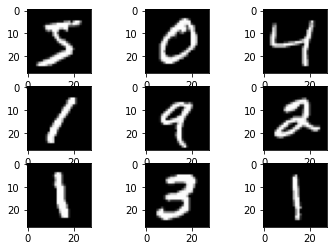

In [2]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

**Prepare** **Pixel** **Data**

In [3]:
import matplotlib.pyplot as plt
import keras


num_classes = 10
# reshape dataset to have a single channel
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [4]:
# normalize to range 0-1
x_train /= 255
x_test /= 255

# one hot encode target values
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


**Define** **Model**

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print(l.name, l.input_shape,'==>',l.output_shape)
print
print(model.summary())

dense (None, 784) ==> (None, 512)
dense_1 (None, 512) ==> (None, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
for i in range(5):
    model.add(Dense(512))
model.add(Dense(10, activation='softmax'))
for l in model.layers:
    print(l.name, l.input_shape,'==>',l.output_shape)
print
print (model.summary())

dense_3 (None, 784) ==> (None, 512)
dense_4 (None, 512) ==> (None, 512)
dense_5 (None, 512) ==> (None, 512)
dense_6 (None, 512) ==> (None, 512)
dense_7 (None, 512) ==> (None, 512)
dense_8 (None, 512) ==> (None, 512)
dense_9 (None, 512) ==> (None, 10)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_

**Train** **the** **Network**

Epoch 1/5
469/469 [==============================] - 20s 41ms/step - loss: 1.9156 - accuracy: 0.6941 - val_loss: 0.5036 - val_accuracy: 0.8553
Epoch 2/5
469/469 [==============================] - 19s 41ms/step - loss: 0.5754 - accuracy: 0.8298 - val_loss: 0.5273 - val_accuracy: 0.8508
Epoch 3/5
469/469 [==============================] - 19s 41ms/step - loss: 0.4448 - accuracy: 0.8698 - val_loss: 0.3406 - val_accuracy: 0.9006
Epoch 4/5
469/469 [==============================] - 19s 41ms/step - loss: 0.4026 - accuracy: 0.8832 - val_loss: 0.3355 - val_accuracy: 0.9072
Epoch 5/5
469/469 [==============================] - 19s 41ms/step - loss: 0.3720 - accuracy: 0.8922 - val_loss: 0.3803 - val_accuracy: 0.8895
Test loss: 0.38
Test accuracy: 0.89


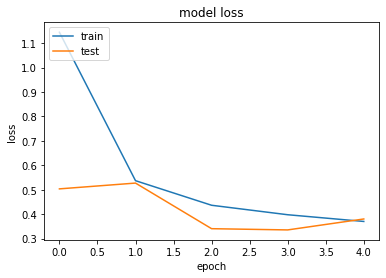

In [11]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print
print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

**Using** **different** **Activation** **Functions**

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4998 - accuracy: 0.8517 - val_loss: 0.3273 - val_accuracy: 0.9080
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3094 - accuracy: 0.9120 - val_loss: 0.2909 - val_accuracy: 0.9163
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2888 - accuracy: 0.9199 - val_loss: 0.3133 - val_accuracy: 0.9100
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2798 - accuracy: 0.9215 - val_loss: 0.2990 - val_accuracy: 0.9179
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2741 - accuracy: 0.9237 - val_loss: 0.3118 - val_accuracy: 0.9192
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2736 - accuracy: 0.9235 - val_loss: 0.3164 - val_accuracy: 0.9111
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2781 - accuracy: 0.9238 - val_loss: 0.2946 - val_accuracy: 0.9206

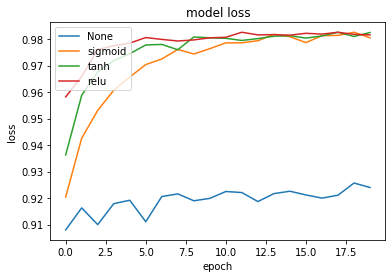

In [12]:

epochs = 20

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_accuracy'])
    
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')